In [1]:
#import libraries
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

# for accuracy and loss graph
import matplotlib.pyplot as plt

In [2]:
keras.__version__

'2.7.0'

In [3]:
train_data_path = r"C:\Users\Nagarjun\Desktop\Project\model training\dataset\train"
validation_data_path = r"C:\Users\Nagarjun\Desktop\Project\model training\dataset\test"

In [4]:
# show augmented images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [5]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(224, 224), # all images will be resized to 224x224
                                      batch_size=32,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

Found 2464 images belonging to 5 classes.


In [6]:
training_data.class_indices

{'Leaf Lesions': 0,
 'bacterial_blight': 1,
 'curl_virus': 2,
 'fussarium_wilt': 3,
 'healthy': 4}

In [7]:
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)

# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(224,224),
                                  batch_size=32,
                                  class_mode='binary')

Found 367 images belonging to 5 classes.


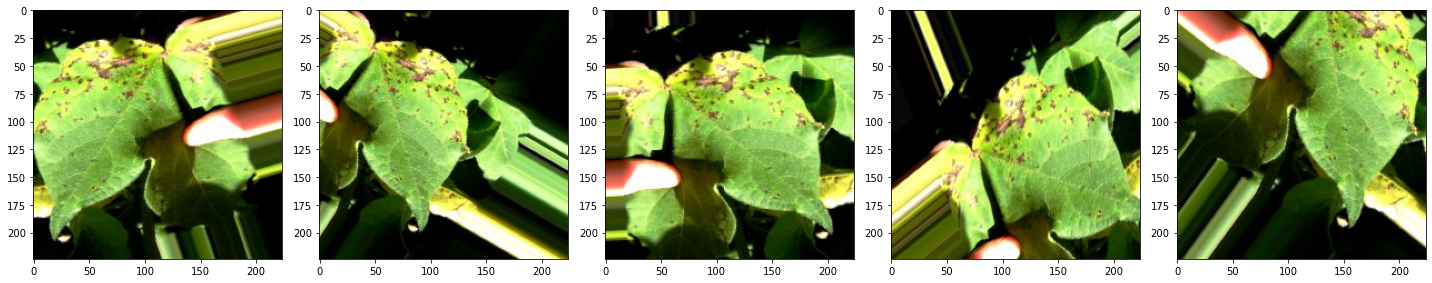

In [8]:
# showing augmented images
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [9]:
# save best model using vall accuracy
model_path = r'C:\Users\Nagarjun\Desktop\Project\model training\pred_cott_dis.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [10]:

#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[224, 224, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=5, activation='softmax') # output layer
])


# compile cnn model
cnn_model.compile(optimizer = Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [11]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [12]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=60, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list) 

Epoch 1/60
77/77 [==============================] - ETA: 0s - loss: 1.1850 - accuracy: 0.5450
Epoch 00001: val_accuracy improved from -inf to 0.58856, saving model to C:\Users\Nagarjun\Desktop\Project\model training\pred_cott_dis.h5
77/77 [==============================] - 115s 1s/step - loss: 1.1850 - accuracy: 0.5450 - val_loss: 0.9550 - val_accuracy: 0.5886
Epoch 2/60
77/77 [==============================] - ETA: 0s - loss: 0.7757 - accuracy: 0.7155
Epoch 00002: val_accuracy improved from 0.58856 to 0.63215, saving model to C:\Users\Nagarjun\Desktop\Project\model training\pred_cott_dis.h5
77/77 [==============================] - 110s 1s/step - loss: 0.7757 - accuracy: 0.7155 - val_loss: 0.8505 - val_accuracy: 0.6322
Epoch 3/60
77/77 [==============================] - ETA: 0s - loss: 0.6607 - accuracy: 0.7537
Epoch 00003: val_accuracy improved from 0.63215 to 0.69482, saving model to C:\Users\Nagarjun\Desktop\Project\model training\pred_cott_dis.h5
77/77 [============================

In [13]:
model_path2 = r'C:\Users\Nagarjun\Desktop\Project\model training\pred_cott_dis.h5'
cnn_model.save(model_path2)

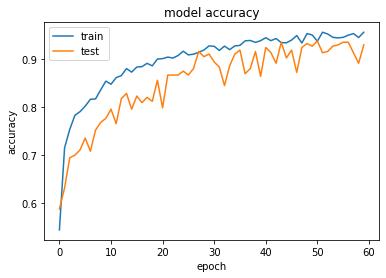

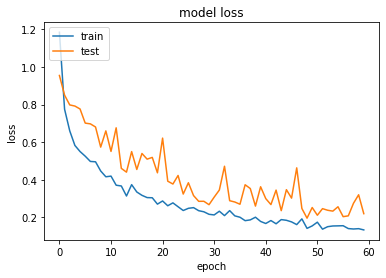

In [14]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
history.history

{'loss': [1.1850249767303467,
  0.7757444381713867,
  0.6606515645980835,
  0.583020806312561,
  0.5506531000137329,
  0.5259677767753601,
  0.4980109632015228,
  0.49616968631744385,
  0.44727879762649536,
  0.4164373576641083,
  0.4199431836605072,
  0.37156179547309875,
  0.3675389587879181,
  0.31423136591911316,
  0.37463057041168213,
  0.3355911672115326,
  0.31779029965400696,
  0.3058004081249237,
  0.30485135316848755,
  0.2709580659866333,
  0.2877960205078125,
  0.26231592893600464,
  0.27769070863723755,
  0.2571633458137512,
  0.23702771961688995,
  0.248742938041687,
  0.2523754835128784,
  0.23606547713279724,
  0.23029649257659912,
  0.21690158545970917,
  0.21360506117343903,
  0.23328040540218353,
  0.20994263887405396,
  0.23646961152553558,
  0.20860342681407928,
  0.20130610466003418,
  0.18312695622444153,
  0.18716022372245789,
  0.201458141207695,
  0.17894113063812256,
  0.16798852384090424,
  0.18371157348155975,
  0.16650548577308655,
  0.18871141970157623,
 

In [16]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(cnn_model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Nagarjun\AppData\Local\Temp\tmpvvr335tm\assets
